In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fraud_train=pd.read_csv('E:/ANUSHA/Data analytics/datasets/archive/fraudTrain.csv')

In [3]:
fraud_test=pd.read_csv('E:/ANUSHA/Data analytics/datasets/archive/fraudTest.csv')

In [4]:
fraud_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
fraud_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
fraud_train.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
fraud_test.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
fraud_train=fraud_train.drop(['cc_num','first','last','trans_num'], axis=1)

In [9]:
fraud_test=fraud_test.drop(['cc_num','first','last','trans_num'], axis=1)

In [10]:
fraud_train.head()

,trans_date_trans_time,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0


In [11]:
fraud_test.head()

,trans_date_trans_time,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,2.86,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,29.84,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,fraud_Haley Group,misc_pos,60.05,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,fraud_Johnston-Casper,travel,3.19,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,1371816917,44.959148,-85.884734,0


In [12]:
from datetime import datetime as dt

In [13]:
fraud_train['trans_date_trans_time']= pd.to_datetime(fraud_train['trans_date_trans_time'])
fraud_train['trans_date'] = fraud_train['trans_date_trans_time'].dt.date

In [14]:
fraud_train['trans_date'] = pd.to_datetime(fraud_train['trans_date'])

In [15]:
fraud_train['year'] = fraud_train['trans_date'].dt.year

In [16]:
fraud_train['month'] = fraud_train['trans_date'].dt.month

In [17]:
fraud_train['day'] = fraud_train['trans_date'].dt.day

In [18]:
fraud_test['trans_date_trans_time']= pd.to_datetime(fraud_test['trans_date_trans_time'])
fraud_test['trans_date'] = fraud_test['trans_date_trans_time'].dt.date

In [19]:
fraud_test['trans_date'] = pd.to_datetime(fraud_test['trans_date'])

In [20]:
fraud_test['year'] = fraud_test['trans_date'].dt.year

In [21]:
fraud_test['month'] = fraud_test['trans_date'].dt.month

In [22]:
fraud_test['day'] = fraud_test['trans_date'].dt.day

In [23]:
fraud_train['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [24]:
fraud_train.groupby('is_fraud')['amt'].mean()

is_fraud
0     67.667110
1    531.320092
Name: amt, dtype: float64

In [25]:
pd.crosstab(fraud_train['category'], fraud_train['is_fraud'])

is_fraud,0,1
category,,
entertainment,93781,233
food_dining,91310,151
gas_transport,131041,618
grocery_net,45318,134
grocery_pos,121895,1743
health_fitness,85746,133
home,122917,198
kids_pets,112796,239
misc_net,62372,915


In [26]:
pd.crosstab(fraud_train['category'], fraud_train['is_fraud'], normalize='index')

is_fraud,0,1
category,,
entertainment,0.997522,0.002478
food_dining,0.998349,0.001651
gas_transport,0.995306,0.004694
grocery_net,0.997052,0.002948
grocery_pos,0.985902,0.014098
health_fitness,0.998451,0.001549
home,0.998392,0.001608
kids_pets,0.997886,0.002114
misc_net,0.985542,0.014458


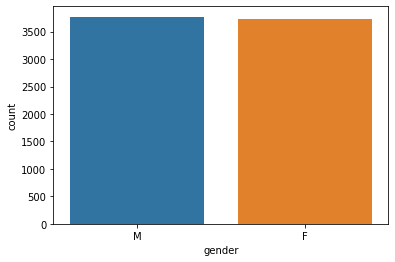

In [27]:
sns.countplot(x='gender', data=fraud_train[fraud_train['is_fraud']==1])

The gender doesnot imply any difference on credit frau

In [28]:
fraud_train = pd.get_dummies(fraud_train,columns=['category'],drop_first=True)

In [29]:
fraud_test = pd.get_dummies(fraud_test,columns=['category'],drop_first=True)

In [31]:
fraud_train.columns = fraud_train.columns.str.replace(' ', '')
fraud_test.columns = fraud_test.columns.str.replace(' ', '')

In [32]:
train=fraud_train.select_dtypes(include='number')

In [33]:
test=fraud_train.select_dtypes(include='number')

In [35]:
train.head()

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,year,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,2019,...,0,0,0,0,1,0,0,0,0,0
1,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,2019,...,1,0,0,0,0,0,0,0,0,0
2,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,2019,...,0,0,0,0,0,0,0,0,0,0
3,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,2019,...,0,0,0,0,0,0,0,0,0,0
4,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,2019,...,0,0,0,0,0,1,0,0,0,0


In [36]:
total=pd.concat([train, test])

In [37]:
x=total.drop('is_fraud', axis=1)

In [38]:
y=total['is_fraud']

In [39]:
x=x.drop(['zip','lat','long','unix_time','merch_lat','merch_long'], axis=1)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler()

In [45]:
x_train=scaler.fit_transform(x_train)

In [46]:
x_test=scaler.transform(x_test)

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dtree=DecisionTreeClassifier()

In [49]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [50]:
from sklearn.metrics import accuracy_score, mean_absolute_error ,mean_squared_error, confusion_matrix, median_absolute_error,classification_report, f1_score,recall_score,precision_score

In [51]:
print("Score the X-train with Y-train is : ", dtree.score(x_train,y_train))
print("Score the X-test  with Y-test  is : ", dtree.score(x_test,y_test))

Score the X-train with Y-train is :  1.0
Score the X-test  with Y-test  is :  0.998781498833555


In [52]:
y_pred = dtree.predict(x_test)

In [53]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
print("Accuracy score " , accuracy_score(y_test,y_pred))
print("F1 score: ", round(f1_score(y_test, y_pred, average='weighted')*100,2),"%")

Accuracy score  0.998781498833555
F1 score:  99.88 %


In [55]:
matrix = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.90      0.90      4536
           0       1.00      1.00      1.00    773469

    accuracy                           1.00    778005
   macro avg       0.95      0.95      0.95    778005
weighted avg       1.00      1.00      1.00    778005



In [56]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.894


In [57]:
print("F1 score: ", round(f1_score(y_test, y_pred, average='weighted')*100,2),"%")

F1 score:  99.88 %
